In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
datos = pd.read_excel("salida_scraping.xlsx")

datos.head()

,budget,company,country,director,genre,gross,name,rating,day_released,month_released,...,star,votes,writer,year,hashtag,name_roten,calificacion1,calificacion2,synopsis,ruta
0,100000000,Red Granite Pictures,USA,Martin Scorsese,Biography,116900694,The Wolf of Wall Street,R,25,12,...,Leonardo DiCaprio,895552,Terence Winter,2013,#TheWolfofWallStreet,the_wolf_of_wall_street,80.0,83.0,in 1987 jordan belfort leonardo dicaprio ta...,https://www.rottentomatoes.com/m/the_wolf_of_w...
1,20000000,New Line Cinema,USA,James Wan,Horror,137400141,The Conjuring,R,19,7,...,Patrick Wilson,342870,Chad Hayes,2013,#TheConjuring,the_conjuring,86.0,83.0,in 1970 paranormal investigators and demonolo...,https://www.rottentomatoes.com/m/the_conjuring
2,46000000,Alcon Entertainment,USA,Denis Villeneuve,Crime,61002302,Prisoners,R,20,9,...,Hugh Jackman,449489,Aaron Guzikowski,2013,#Prisoners,prisoners,81.0,87.0,keller dover hugh jackman faces a parent s w...,https://www.rottentomatoes.com/m/prisoners_2013
3,150000000,Walt Disney Animation Studios,USA,Chris Buck,Animation,400738009,Frozen,PG,27,11,...,Kristen Bell,464149,Jennifer Lee,2013,#Frozen,frozen,56.0,57.0,a performance artist turns his suicide into a ...,https://www.rottentomatoes.com/m/frozen
4,75000000,Summit Entertainment,USA,Louis Leterrier,Crime,117723989,Now You See Me,PG-13,31,5,...,Jesse Eisenberg,505432,Ed Solomon,2013,#NowYouSeeMe,now_you_see_me,51.0,70.0,charismatic magician atlas jesse eisenberg l...,https://www.rottentomatoes.com/m/now_you_see_me


Generamos el campo calculado de ganancia 

In [25]:
datos["ganancia"]= datos["budget"] - datos["gross"]
datos["validador"] = 1

# Cantidad de peliculas por pais

In [4]:
datos=pd.DataFrame(datos)
agrupacion_pais = datos.groupby(['country'], as_index = False)[['validador']].sum()
#groupby("country")["name"].count()
agrupacion_pais

,country,validador
0,France,30
1,UK,116
2,USA,577


In [5]:
#labels = grupacion_pais2.set_index
#men_means =grupacion_pais2["name"]
labels = agrupacion_pais["country"]
men_means =agrupacion_pais["validador"]

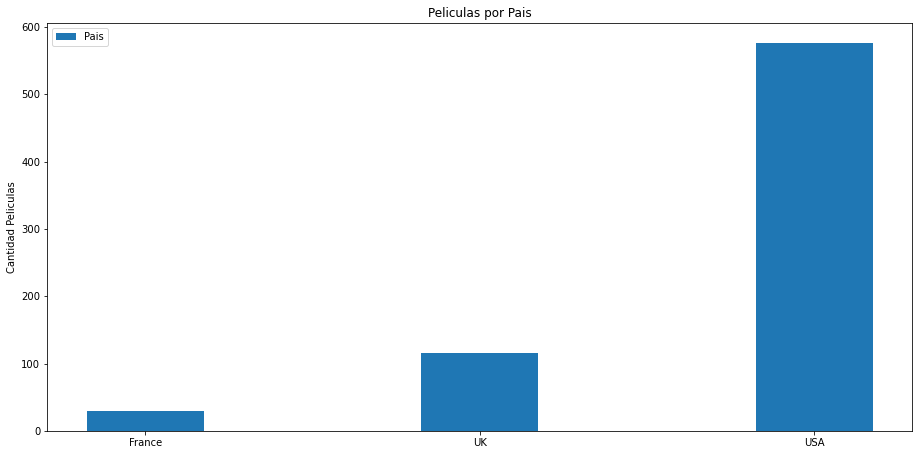

In [6]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width,  label='Pais')
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')
fig.set_size_inches(15.5, 7.5)

ax.set_ylabel('Cantidad Peliculas')
ax.set_title('Peliculas por Pais')
ax.legend()

plt.show()

# Cantidad de peliculas por genero

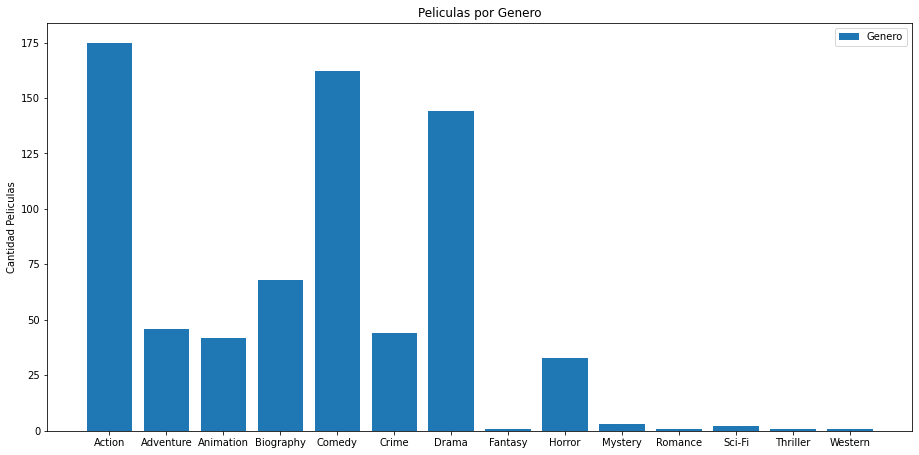

In [7]:
agrupacion_pais = datos.groupby(['genre'], as_index = False)[['validador']].sum()
#groupby("country")["name"].count()
agrupacion_pais
labels = agrupacion_pais["genre"]
men_means =agrupacion_pais["validador"]
width = 0.80       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

ax.bar(labels, men_means, width,  label='Genero')
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Cantidad Peliculas')
ax.set_title('Peliculas por Genero')
ax.legend()
plt.show()

# Cantidad de peliculas por año

No handles with labels found to put in legend.


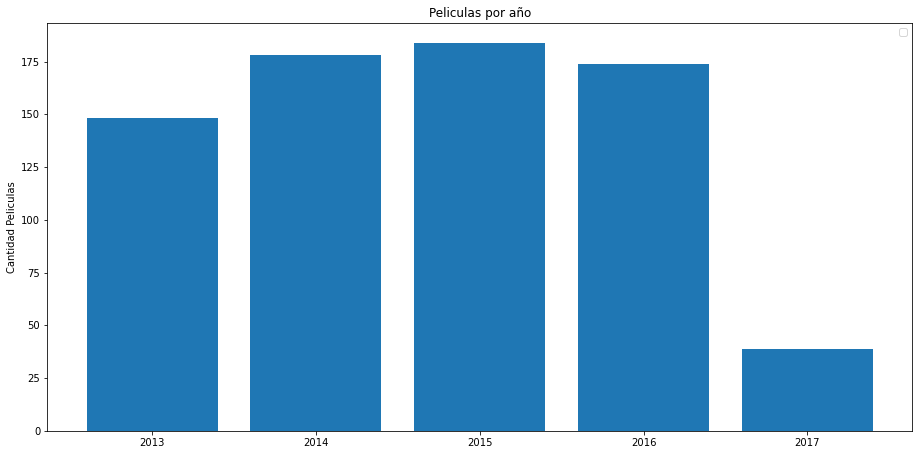

In [8]:
agrupacion_pais = datos.groupby(['year_released'], as_index = False)[['validador']].sum()
#groupby("country")["name"].count()
agrupacion_pais
labels = agrupacion_pais["year_released"]
men_means =agrupacion_pais["validador"]
width = 0.80       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 7.5)

ax.bar(labels, men_means, width)
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')

ax.set_ylabel('Cantidad Peliculas')
ax.set_title('Peliculas por año')
ax.legend()
plt.show()

# Inversion vs Ganancia 

In [27]:
import plotly.graph_objs as go
from plotly.offline import iplot
trace = go.Scatter(x=datos['gross'].values,

                    y=datos['budget'].values,

                    text=datos['name'].values,

                    mode='markers') 
 
layout = go.Layout(title="Inversion vs Ganancia ")
 
fig = go.Figure(data=trace, layout=layout)

iplot(fig)

In [11]:
#datos['budget'] = datos['budget'].replace([0], 1)
datos[["genre",'name','budget','gross']].sort_values('gross', ascending=False).head(20)

,genre,name,budget,gross
370,Action,Star Wars: The Force Awakens,245000000,936662225
379,Action,Jurassic World,150000000,652270625
555,Action,Rogue One,200000000,532177324
613,Animation,Finding Dory,200000000,486295561
385,Action,Avengers: Age of Ultron,250000000,459005868
10,Action,The Hunger Games: Catching Fire,130000000,424668047
562,Action,Captain America: Civil War,250000000,408084349
3,Animation,Frozen,150000000,400738009
41,Animation,Despicable Me 2,76000000,368061265
605,Adventure,The Jungle Book,175000000,364001123


# 20 peliculas con mas cantidad de recaudo segun su costo

In [12]:
#datos['budget'] = datos['budget'].replace([0], 1)
filtrado=datos[datos['budget']>0]

filtrado["Porc_recuadado"]=filtrado["gross"]/filtrado["budget"]
filtrado[['name','budget','gross','Porc_recuadado']].sort_values('Porc_recuadado', ascending=False).head(20)

<ipython-input-12-d1dcdbb6fddb>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,budget,gross,Porc_recuadado
367,The Quiet Ones,200000,8496112,42.480560
233,Unfriended,1000000,31537320,31.537320
313,God's Not Dead,2000000,60755732,30.377866
494,War Room,3000000,67790117,22.596706
26,La noche de la expiación,3000000,64473115,21.491038
570,Moonlight,1500000,27850912,18.567275
144,Fruitvale Station,900000,16097842,17.886491
69,Insidious: Chapter 2,5000000,83586447,16.717289
151,A Haunted House,2500000,40041683,16.016673
665,Sleight,250000,3847290,15.389160


# Linea de tiempo estrenos

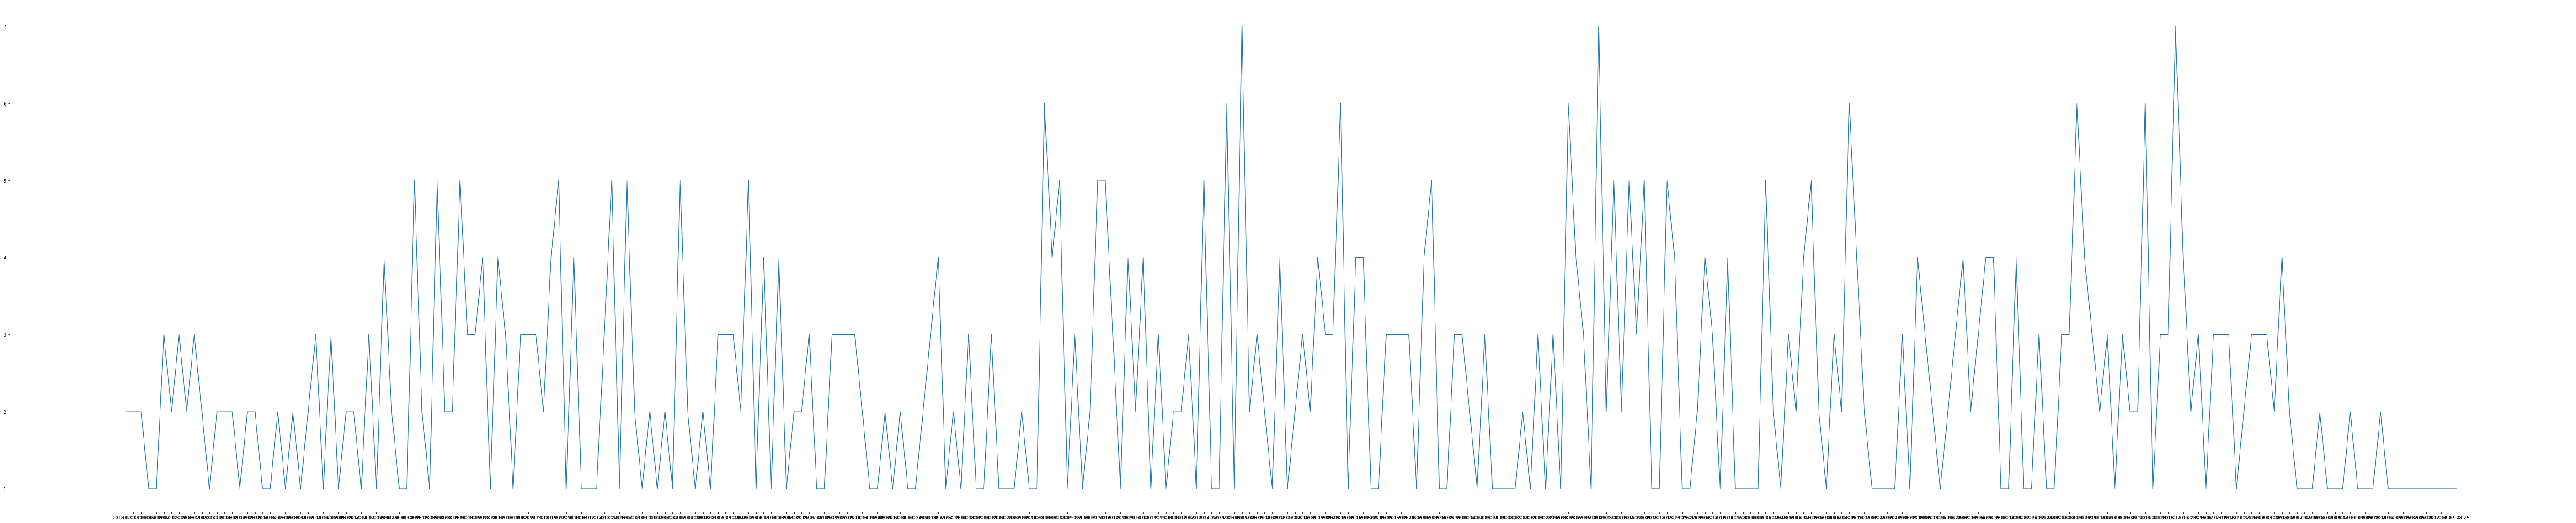

,released,validador
0,2013-01-11,2
1,2013-01-18,2
2,2013-01-25,2
3,2013-01-4,1
4,2013-02-1,1
...,...,...
303,2017-06-9,1
304,2017-07-14,1
305,2017-07-27,1
306,2017-07-28,1


In [13]:
agrupacion_fecha = datos.groupby(['released'], as_index = False)[['validador']].sum()
fig, ax = plt.subplots()
fig.set_size_inches(100.5, 20.5)
#fig.ylabel('some numbers')
ax.plot(agrupacion_fecha['released'], agrupacion_fecha['validador'])
plt.show()

agrupacion_fecha

# presupuesto de peliculas por genero

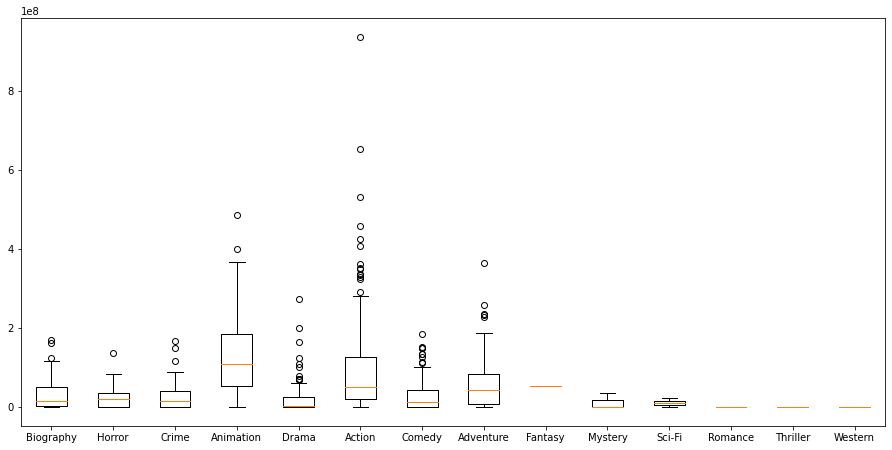

In [14]:
# Showing multiple boxplots on the same window
datos0=datos['gross'][datos['genre']=="Biography"]
datos1=datos['gross'][datos['genre']=="Horror"]
datos2=datos['gross'][datos['genre']=="Crime"]
datos3=datos['gross'][datos['genre']=="Animation"]
datos4=datos['gross'][datos['genre']=="Drama"]
datos5=datos['gross'][datos['genre']=="Action"]
datos6=datos['gross'][datos['genre']=="Comedy"]
datos7=datos['gross'][datos['genre']=="Adventure"]
datos8=datos['gross'][datos['genre']=="Fantasy"]
datos9=datos['gross'][datos['genre']=="Mystery"]
datos10=datos['gross'][datos['genre']=="Sci-Fi"]
datos11=datos['gross'][datos['genre']=="Romance"]
datos12=datos['gross'][datos['genre']=="Thriller"]
datos13=datos['gross'][datos['genre']=="Western"]
box_plot_data=[datos0,datos1,datos2,datos3,datos4,datos5,datos6,datos7,datos8,datos9,datos10,datos11,datos12,datos13]
#plt.boxplot((datos3['gross']), notch=True, labels=["Biography"])
#plt.show()
labels_plot=["Biography","Horror","Crime","Animation","Drama","Action","Comedy","Adventure","Fantasy","Mystery","Sci-Fi","Romance","Thriller","Western"]

fig, ax = plt.subplots()
ax.boxplot(box_plot_data,labels=labels_plot)
fig.set_size_inches(15.5, 7.5)
plt.show()

# Recaudo por genero

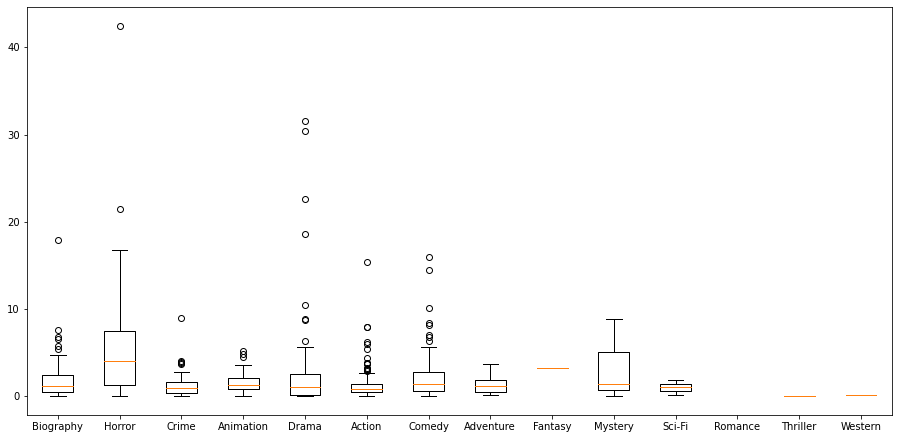

In [15]:
# Showing multiple boxplots on the same window
datos0=filtrado['Porc_recuadado'][filtrado['genre']=="Biography"]
datos1=filtrado['Porc_recuadado'][filtrado['genre']=="Horror"]
datos2=filtrado['Porc_recuadado'][filtrado['genre']=="Crime"]
datos3=filtrado['Porc_recuadado'][filtrado['genre']=="Animation"]
datos4=filtrado['Porc_recuadado'][filtrado['genre']=="Drama"]
datos5=filtrado['Porc_recuadado'][filtrado['genre']=="Action"]
datos6=filtrado['Porc_recuadado'][filtrado['genre']=="Comedy"]
datos7=filtrado['Porc_recuadado'][filtrado['genre']=="Adventure"]
datos8=filtrado['Porc_recuadado'][filtrado['genre']=="Fantasy"]
datos9=filtrado['Porc_recuadado'][filtrado['genre']=="Mystery"]
datos10=filtrado['Porc_recuadado'][filtrado['genre']=="Sci-Fi"]
datos11=filtrado['Porc_recuadado'][filtrado['genre']=="Romance"]
datos12=filtrado['Porc_recuadado'][filtrado['genre']=="Thriller"]
datos13=filtrado['Porc_recuadado'][filtrado['genre']=="Western"]
box_plot_data=[datos0,datos1,datos2,datos3,datos4,datos5,datos6,datos7,datos8,datos9,datos10,datos11,datos12,datos13]
#plt.boxplot((datos3['Porc_recuadado']), notch=True, labels=["Biography"])
#plt.show()
labels_plot=["Biography","Horror","Crime","Animation","Drama","Action","Comedy","Adventure","Fantasy","Mystery","Sci-Fi","Romance","Thriller","Western"]

fig, ax = plt.subplots()
ax.boxplot(box_plot_data,labels=labels_plot)
fig.set_size_inches(15.5, 7.5)
plt.show()

# Recaudo por actor

In [16]:
agrupacion_stars = datos.groupby(['star'], as_index = False)[['gross','validador']].sum()
agrupacion_stars['promedio']=agrupacion_stars['gross']/agrupacion_stars['validador']

agrupacion_stars.sort_values('promedio', ascending=False).head(20)


,star,gross,validador,promedio
91,Daisy Ridley,936662225,1,9.366622e+08
82,Chris Pratt,985447225,2,4.927236e+08
119,Ellen DeGeneres,486295561,1,4.862956e+08
320,Neel Sethi,364001123,1,3.640011e+08
147,Ginnifer Goodwin,341268248,1,3.412682e+08
50,Billy Crystal,268492764,1,2.684928e+08
135,Felicity Jones,532192648,2,2.660963e+08
357,Robert Downey Jr.,506125256,2,2.530626e+08
33,Auli'i Cravalho,248757044,1,2.487570e+08
21,Angelina Jolie,241410378,1,2.414104e+08


In [26]:


trace = go.Scatter(x=agrupacion_stars['validador'].values,

                    y=agrupacion_stars['gross'].values,

                    text=agrupacion_stars['star'].values,

                    mode='markers') 
 
layout = go.Layout(title="Recaudo por artista")
 
fig = go.Figure(data=trace, layout=layout)

iplot(fig)

# Recaudo por director

In [18]:
agrupacion_director = datos.groupby(['director'], as_index = False)[['gross','validador']].sum()
agrupacion_director['promedio']=agrupacion_stars['gross']/agrupacion_stars['validador']

agrupacion_director.sort_values('promedio', ascending=False).head(20)

,director,gross,validador,promedio
91,Chris Rock,25277561,1,9.366622e+08
82,Catherine Hardwicke,1162653,1,4.927236e+08
119,Dave Green,120968504,2,4.862956e+08
320,Kenneth Lonergan,47695120,1,3.640011e+08
147,Deon Taylor,9093856,1,3.412682e+08
50,Ben Stiller,87085531,2,2.684928e+08
135,David Robert Mitchell,14673301,1,2.660963e+08
357,Mark Osborne,1339152,1,2.530626e+08
33,Anna Foerster,30348260,1,2.487570e+08
21,Andrew Erwin,10429707,1,2.414104e+08


In [28]:

trace = go.Scatter(x=agrupacion_director['validador'].values,

                    y=agrupacion_director['gross'].values,

                    text=agrupacion_director['director'].values,

                    mode='markers') 
 
layout = go.Layout(title="Recaudo por director")
 
fig = go.Figure(data=trace, layout=layout)

iplot(fig)

# Peliculas por puntaje de opinion

In [29]:
trace = go.Scatter(x=datos['calificacion1'].values,

                    y=datos['calificacion2'].values,

                    text=datos['name'].values,

                    mode='markers') 
 
layout = go.Layout(title="Peliculas por puntaje de opinion")
 
fig = go.Figure(data=trace, layout=layout)

iplot(fig)

In [21]:
datos['promedio_ganancia']=round(datos['budget']/datos['gross'],0)
datos['calificacion1_dec']=round(datos['calificacion1']/20,0)
datos['calificacion2_dec']=round(datos['calificacion2']/20,0)
datos

,budget,company,country,director,genre,gross,name,rating,day_released,month_released,...,name_roten,calificacion1,calificacion2,synopsis,ruta,ganancia,validador,promedio_ganancia,calificacion1_dec,calificacion2_dec
0,100000000,Red Granite Pictures,USA,Martin Scorsese,Biography,116900694,The Wolf of Wall Street,R,25,12,...,the_wolf_of_wall_street,80.0,83.0,in 1987 jordan belfort leonardo dicaprio ta...,https://www.rottentomatoes.com/m/the_wolf_of_w...,-16900694,1,1.0,4.0,4.0
1,20000000,New Line Cinema,USA,James Wan,Horror,137400141,The Conjuring,R,19,7,...,the_conjuring,86.0,83.0,in 1970 paranormal investigators and demonolo...,https://www.rottentomatoes.com/m/the_conjuring,-117400141,1,0.0,4.0,4.0
2,46000000,Alcon Entertainment,USA,Denis Villeneuve,Crime,61002302,Prisoners,R,20,9,...,prisoners,81.0,87.0,keller dover hugh jackman faces a parent s w...,https://www.rottentomatoes.com/m/prisoners_2013,-15002302,1,1.0,4.0,4.0
3,150000000,Walt Disney Animation Studios,USA,Chris Buck,Animation,400738009,Frozen,PG,27,11,...,frozen,56.0,57.0,a performance artist turns his suicide into a ...,https://www.rottentomatoes.com/m/frozen,-250738009,1,0.0,3.0,3.0
4,75000000,Summit Entertainment,USA,Louis Leterrier,Crime,117723989,Now You See Me,PG-13,31,5,...,now_you_see_me,51.0,70.0,charismatic magician atlas jesse eisenberg l...,https://www.rottentomatoes.com/m/now_you_see_me,-42723989,1,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,22,7,...,absolutely_fabulous:_the_movie,59.0,41.0,publicist edina monsoon and best friend patsy ...,https://www.rottentomatoes.com/m/absolutely_fa...,-4750497,1,0.0,3.0,2.0
719,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,6,5,...,mothers_and_daughters,18.0,28.0,a pregnant photographer selma blair captures...,https://www.rottentomatoes.com/m/mothers_and_d...,-28368,1,0.0,1.0,1.0
720,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,25,7,...,batman:_the_killing_joke,40.0,46.0,batman kevin conroy must save commissioner g...,https://www.rottentomatoes.com/m/batman_the_ki...,-275000,1,1.0,2.0,2.0
721,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2,12,...,the_eyes_of_my_mother,78.0,57.0,francisca kika magalhaes has been unfazed by...,https://www.rottentomatoes.com/m/the_eyes_of_m...,-25981,1,0.0,4.0,3.0


In [22]:
from pandas import ExcelWriter
writer = ExcelWriter('C:/Users/ASUS/Downloads/base_final_movies.xlsx')
datos.to_excel(writer, 'Hoja de datos', index=False)
writer.save()

# Relacion entre variables

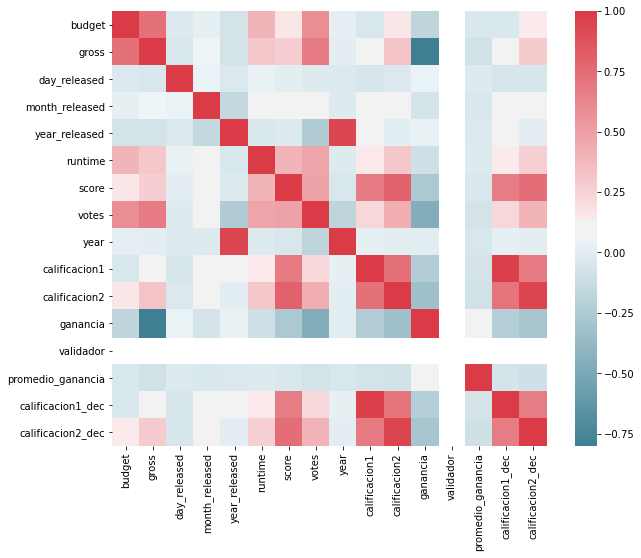

In [23]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = datos.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)